In [42]:
# 1. Load the sample dataset provided in text_class.csv.
import pandas as pd
df = pd.read_excel(r'C:\Users\LENOVO\Desktop\NLP\NLP Final project\part - A IMDb Movie Review Sentiment Analysis\Imdb.xlsx')
print(df)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [43]:
# 2.Display the first 5 rows of the dataset.
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [44]:
# dropping duplicate if any
df = df.drop_duplicates()
df = df.reset_index(drop=True)
display(df)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49576,I thought this movie did a down right good job...,positive
49577,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49578,I am a Catholic taught in parochial elementary...,negative
49579,I'm going to have to disagree with the previou...,negative


In [45]:
#checking null values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [46]:
#checking classes percentage
df['sentiment'].value_counts(normalize=True) * 100

sentiment
positive    50.18858
negative    49.81142
Name: proportion, dtype: float64

The classes are balanced 

In [47]:
# number of words in each review
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# number of characters in each review
df['char_length'] = df['review'].apply(lambda x: len(x))

In [48]:
df

,review,sentiment,review_length,char_length
0,One of the other reviewers has mentioned that ...,positive,307,1761
1,A wonderful little production. <br /><br />The...,positive,162,998
2,I thought this was a wonderful way to spend ti...,positive,166,926
3,Basically there's a family where a little boy ...,negative,138,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1317
...,...,...,...,...
49576,I thought this movie did a down right good job...,positive,194,1008
49577,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112,642
49578,I am a Catholic taught in parochial elementary...,negative,230,1280
49579,I'm going to have to disagree with the previou...,negative,212,1234


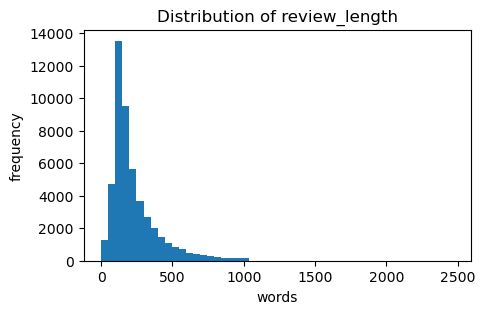

In [49]:
import matplotlib.pyplot as plt
df['review_length'].plot(kind='hist', bins=50, figsize=(5,3), title='Distribution of review_length')
plt.xlabel('words')
plt.ylabel('frequency')
plt.show()

A histogram of review lengths (in words) was plotted using 50 bins, where each bin represents an interval of 50 words (0–50, 50–100, 100–150, etc.).
The tallest bar corresponds to the 100–150 word range, indicating that the majority of IMDb reviews fall within this length.
Shorter reviews (0–50 and 50–100 words) are less frequent, while the number of reviews gradually decreases beyond 150 words.
This shows that users typically write moderately detailed reviews.

<Axes: ylabel='Frequency'>

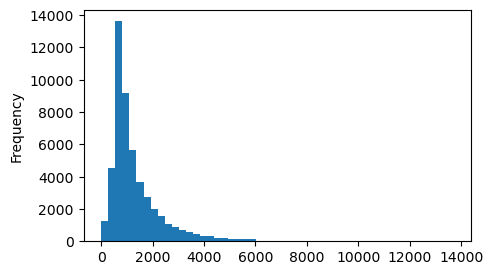

In [50]:
df['char_length'].plot(kind='hist', bins=50, figsize=(5,3))

In [51]:
df.describe()

,review_length,char_length
count,49581.000000,49581.000000
mean,231.335653,1311.111696
std,171.535991,991.713354
min,1.000000,7.000000
25%,126.000000,699.000000
50%,173.000000,971.000000
75%,281.000000,1592.000000
max,2470.000000,13704.000000


In this section, I performed basic data exploration on the IMDb movie reviews dataset. I began by loading the dataset and displaying the first few rows to understand its structure. I checked for missing values using df.isnull().sum(), and confirmed that both the review and sentiment columns contained no null entries. Next, I examined the class distribution using value_counts(), which showed that the dataset is perfectly balanced with 50% positive and 50% negative reviews. To analyze review lengths, I created two new features: review_length, which measures the number of words in each review, and char_length, which measures the number of characters. Finally, I plotted histograms for both word length and character length using 50 bins. The distributions revealed a clear right-skewed pattern, where most reviews fall within 100–150 words and approximately 700–1200 characters. These steps helped identify trends, detect outliers, and understand the overall structure of the dataset before preprocessing.

In [52]:
# 1. Convert all text to lowercase
# creating a function to transform into lower case

def low(df):
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = df[i].str.lower()
    return df

In [53]:
low(df)

,review,sentiment,review_length,char_length
0,one of the other reviewers has mentioned that ...,positive,307,1761
1,a wonderful little production. <br /><br />the...,positive,162,998
2,i thought this was a wonderful way to spend ti...,positive,166,926
3,basically there's a family where a little boy ...,negative,138,748
4,"petter mattei's ""love in the time of money"" is...",positive,230,1317
...,...,...,...,...
49576,i thought this movie did a down right good job...,positive,194,1008
49577,"bad plot, bad dialogue, bad acting, idiotic di...",negative,112,642
49578,i am a catholic taught in parochial elementary...,negative,230,1280
49579,i'm going to have to disagree with the previou...,negative,212,1234


In [54]:
# 2. Remove punctuation and special characters.
import re #(regex)
df['review'] =  df['review'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x)) # ^A-za-z, it means remove everthing except A-Z and a-z
# \ is an excape character which tells python to treat the character beside it as a special character. So \s means, single space.
#So im telling python remove anything except alphabets from A to Z and single space
print(df)

                                                  review sentiment  \
0      one of the other reviewers has mentioned that ...  positive   
1      a wonderful little production br br the filmin...  positive   
2      i thought this was a wonderful way to spend ti...  positive   
3      basically theres a family where a little boy j...  negative   
4      petter matteis love in the time of money is a ...  positive   
...                                                  ...       ...   
49576  i thought this movie did a down right good job...  positive   
49577  bad plot bad dialogue bad acting idiotic direc...  negative   
49578  i am a catholic taught in parochial elementary...  negative   
49579  im going to have to disagree with the previous...  negative   
49580  no one expects the star trek movies to be high...  negative   

       review_length  char_length  
0                307         1761  
1                162          998  
2                166          926  
3              

In [55]:
# 3. Tokenize the text and remove stopwords. Provide the processed version of the first 5 rows.
# first I am tokenizing 
from nltk.tokenize import word_tokenize
df['tokens'] = df['review'].apply(lambda x: word_tokenize(x.lower()))
print(df)

                                                  review sentiment  \
0      one of the other reviewers has mentioned that ...  positive   
1      a wonderful little production br br the filmin...  positive   
2      i thought this was a wonderful way to spend ti...  positive   
3      basically theres a family where a little boy j...  negative   
4      petter matteis love in the time of money is a ...  positive   
...                                                  ...       ...   
49576  i thought this movie did a down right good job...  positive   
49577  bad plot bad dialogue bad acting idiotic direc...  negative   
49578  i am a catholic taught in parochial elementary...  negative   
49579  im going to have to disagree with the previous...  negative   
49580  no one expects the star trek movies to be high...  negative   

       review_length  char_length  \
0                307         1761   
1                162          998   
2                166          926   
3          

In [56]:
# now I will remove the stop words then I will lemmitize 
from nltk.corpus import stopwords
stop_words = set(stopwords.words('English'))
df['after_stop'] = df['tokens'].apply(lambda x: [i for i in x if i not in stop_words])

print('Before stopwatch: ', df['tokens'].head())
print('After stopwatch: ', df['after_stop'].head())

Before stopwatch:  0    [one, of, the, other, reviewers, has, mentione...
1    [a, wonderful, little, production, br, br, the...
2    [i, thought, this, was, a, wonderful, way, to,...
3    [basically, theres, a, family, where, a, littl...
4    [petter, matteis, love, in, the, time, of, mon...
Name: tokens, dtype: object
After stopwatch:  0    [one, reviewers, mentioned, watching, oz, epis...
1    [wonderful, little, production, br, br, filmin...
2    [thought, wonderful, way, spend, time, hot, su...
3    [basically, theres, family, little, boy, jake,...
4    [petter, matteis, love, time, money, visually,...
Name: after_stop, dtype: object


In [57]:
# applying lemmatization with POS tags
from nltk import pos_tag, word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

df['pos_tags'] = df['after_stop'].apply(lambda x: pos_tag(x))

def get_wordnet_pos(tag):
    if tag.startswith('J'): return wordnet.ADJ
    elif tag.startswith('V'): return wordnet.VERB
    elif tag.startswith('N'): return wordnet.NOUN
    elif tag.startswith('R'): return wordnet.ADV
    else: return wordnet.NOUN

lemm = WordNetLemmatizer()
df['lemm_with_pos'] = df['pos_tags'].apply(lambda x: [lemm.lemmatize(word, get_wordnet_pos(pos)) for (word, pos) in x])
print(df[['after_stop', 'lemm_with_pos']].head())

                                          after_stop  \
0  [one, reviewers, mentioned, watching, oz, epis...   
1  [wonderful, little, production, br, br, filmin...   
2  [thought, wonderful, way, spend, time, hot, su...   
3  [basically, theres, family, little, boy, jake,...   
4  [petter, matteis, love, time, money, visually,...   

                                       lemm_with_pos  
0  [one, reviewer, mention, watch, oz, episode, y...  
1  [wonderful, little, production, br, br, film, ...  
2  [think, wonderful, way, spend, time, hot, summ...  
3  [basically, there, family, little, boy, jake, ...  
4  [petter, matteis, love, time, money, visually,...  


In [58]:
# I'll apply word embedding now
# training the model
from gensim.models import Word2Vec
import numpy as np

model = Word2Vec(sentences=df['lemm_with_pos'].tolist(), vector_size=100, window=3, min_count=1, sg=1)
#Here vector_size=100 means 100 vectors
#window= 3, it will look for 3 words before and after the target word when training the model. 
'''sk=1 The Skip-Gram model takes every single word in the training text and treats it as a target word, one by one.
For each target word, it tries to predict the nearby words (called context words) within the defined window size.'''

#min_count=1 It  tell the model to ignore all words that appear less than this number of times in the training text

# tolist will convert a panda series, 1D array into a python list

Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_fl

'sk=1 The Skip-Gram model takes every single word in the training text and treats it as a target word, one by one.\nFor each target word, it tries to predict the nearby words (called context words) within the defined window size.'

In [59]:
# Computing the sentence embedding
embeddings = []

for i in df['lemm_with_pos']:
    word_embeddings = [model.wv[j] for j in i if j in model.wv]
    
    if word_embeddings:
        sentence_embedding = np.mean(word_embeddings, axis=0)
    else:
        sentence_embedding = np.zeros(model.vector_size)
    
    embeddings.append(sentence_embedding)

In [60]:
#convert into array
import numpy as np

embedding_array = np.array(embeddings)
print(embedding_array)

[[-0.00899753  0.16426368  0.02046997 ... -0.2771341  -0.0567656
   0.01277144]
 [-0.065729    0.24538688  0.10972116 ... -0.27945656 -0.022937
   0.04836082]
 [-0.09908062  0.15774935  0.11018036 ... -0.31733426 -0.07486361
   0.0127439 ]
 ...
 [ 0.00497991  0.19180366 -0.06083744 ... -0.30683452 -0.08716928
   0.05861232]
 [-0.01106469  0.15477319  0.05550148 ... -0.27391315 -0.05100828
  -0.00547844]
 [-0.05958476  0.17368217  0.21975651 ... -0.48443222 -0.09081228
   0.0921585 ]]


Instead of using traditional Bag-of-Words or TF-IDF, I implemented Word2Vec embeddings using Gensim. Each word is represented as a dense 100-dimensional vector, and sentence vectors are obtained by averaging the word embeddings. This captures semantic relationships between words and improves generalization over sparse vector models.

In [61]:
# applying label encoding on label columns to convert it into 1 and 0
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
y_encoded = label.fit_transform(df['sentiment'])

In [62]:
print(label.classes_, label.transform(label.classes_))

['negative' 'positive'] [0 1]


After calculating review_length and char_length, I transformed the text into lowercase and removed punctuation, special characters, and symbols. Then I tokenized the text into individual words, removed stopwords to retain only meaningful terms, and applied lemmatization using POS tags to convert words to their base form. After preprocessing, I trained a Word2Vec model to generate 100-dimensional word embeddings and converted each review into a sentence embedding by averaging its word vectors. These steps cleaned the text and converted it into meaningful numerical features for model training.

In [63]:
# sepearting independant and dependant variables
x = embedding_array
y = y_encoded

In [64]:
# I will split the data into 80% training 20 % testing 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(39664, 100)
(9917, 100)
(39664,)
(9917,)


In [65]:
## training the logistic model

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# StandardScaler makes all values in columns similar in size so that one big column does not dominate the smaller columns. Everthing will be fair
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model1 = LogisticRegression(class_weight='balanced') # class_weight='balanced' make balance between the categories. 
'''Like if one category has 500 data and the other category has 100 data, without class weight balance, model will learn more from 
the category which has 500 rows as it has more data.. So after using balance, more weightage will be given to smaller class '''

model1.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [66]:
#checking overfitting underfitting
print(model1.score(x_train,y_train))
print(model1.score(x_test,y_test))

0.8680163372327552
0.8682061107189675


In [67]:
y_predict = model1.predict(x_test)

In [68]:
# evaluating
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score = accuracy_score(y_test, y_predict)
confusion_matrix = confusion_matrix(y_test, y_predict)
classification_report = classification_report(y_test, y_predict)

print(f'accuracy_score is {accuracy_score}')
print(f'confusion_matrix is {confusion_matrix}')
print(f'classification_report is {classification_report}')

accuracy_score is 0.8682061107189675
confusion_matrix is [[4315  680]
 [ 627 4295]]
classification_report is               precision    recall  f1-score   support

           0       0.87      0.86      0.87      4995
           1       0.86      0.87      0.87      4922

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917



The Word2Vec-based Logistic Regression model performed very well, achieving an accuracy of about 87% with balanced precision, recall, and F1-scores for both positive and negative classes. The confusion matrix shows that the model correctly classified most reviews, with only a small number of misclassifications. The training and testing scores were nearly identical, indicating that the model generalizes well without overfitting. Overall, the model provides strong and reliable performance for sentiment classification.

In [69]:
# training the model with XGBoost classifier
from xgboost import XGBClassifier
model2 = XGBClassifier(random_state=42, eval_metric='logloss')
model2.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [70]:
# lets check can it predit well or not
y_predict1 = model2.predict(x_test)

In [71]:
#checking scores
print(model2.score(x_train,y_train))
print(model2.score(x_test,y_test))

0.9744604679306171
0.8568115357466976


In [72]:
# evaluating
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score = accuracy_score(y_test, y_predict1)
confusion_matrix = confusion_matrix(y_test, y_predict1)
classification_report = classification_report(y_test, y_predict1)

print(f'accuracy_score is {accuracy_score}')
print(f'confusion_matrix is {confusion_matrix}')
print(f'classification_report is {classification_report}')

accuracy_score is 0.8568115357466976
confusion_matrix is [[4233  762]
 [ 658 4264]]
classification_report is               precision    recall  f1-score   support

           0       0.87      0.85      0.86      4995
           1       0.85      0.87      0.86      4922

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



In [73]:
# traning the model with random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, class_weight= 'balanced', random_state=42, n_jobs=-1) # using n_jobs as this parameter works best with classification problem
#n_jobs = -1 uses all CPU cores, speeds up the training 
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=400, n_jobs=-1,
                       random_state=42)

In [74]:
# lets check can it predit well or not
y_predict2 = rf.predict(x_test)

In [75]:
#checking scores
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

1.0
0.8392659070283351


In [76]:
# evaluating
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score = accuracy_score(y_test, y_predict2)
confusion_matrix = confusion_matrix(y_test, y_predict2)
classification_report = classification_report(y_test, y_predict2)

print(f'accuracy_score is {accuracy_score}')
print(f'confusion_matrix is {confusion_matrix}')
print(f'classification_report is {classification_report}')

accuracy_score is 0.8392659070283351
confusion_matrix is [[4066  929]
 [ 665 4257]]
classification_report is               precision    recall  f1-score   support

           0       0.86      0.81      0.84      4995
           1       0.82      0.86      0.84      4922

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



Model Comparison Summary

In this project, three different machine learning models were trained using Word2Vec embeddings: Logistic Regression, XGBoost Classifier, and Random Forest Classifier. All models were evaluated using accuracy, precision, recall, F1-score, and a confusion matrix.

Among the three, Logistic Regression delivered the best performance, achieving an accuracy of around 87%, with balanced precision, recall, and F1-scores for both positive and negative classes. Its training and testing scores were almost identical, indicating that the model generalizes well without overfitting.

XGBoost and Random Forest also performed well, with accuracies of approximately 84–86%, but they showed slightly higher training-test gaps and less balanced class-wise metrics compared to Logistic Regression.

Overall, Logistic Regression proved to be the most reliable and stable model for sentiment classification in this project.

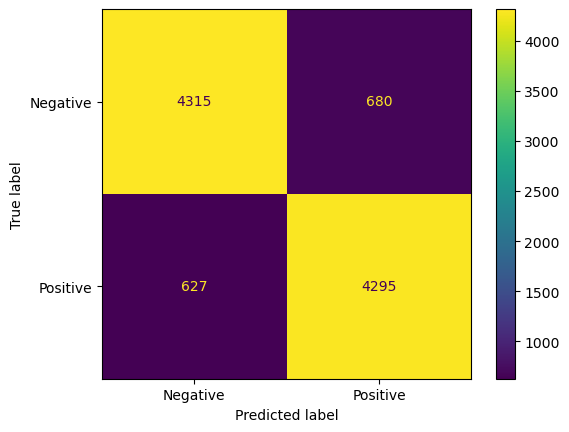

In [77]:
# displaying the confusion matrix of logistic model the result was best among all of my other models
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_predict) # used logistic model
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='viridis')
plt.show()

The confusion matrix shows that the Logistic Regression model performs strongly in sentiment classification. Out of all negative reviews, 4315 were correctly predicted as negative, while only 680 were incorrectly predicted as positive. Similarly, 4295 positive reviews were correctly classified, with 627 misclassified as negative. The high values on the diagonal indicate that the model makes accurate predictions for both classes, with relatively few errors. Overall, this visualization confirms that the model is effective and reliable for binary sentiment classification.

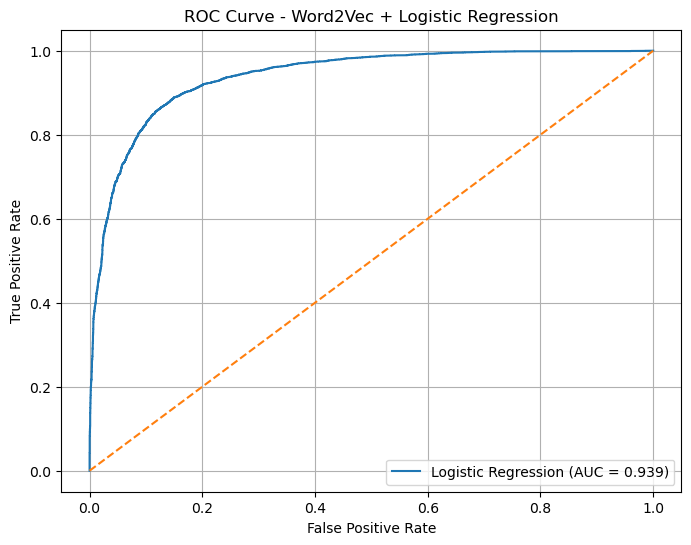

In [92]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob = model1.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Word2Vec + Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


Blue line = model's performance
Orange line = random guessing
Blue line high above orange = model is very good

The ROC curve above shows how well the Logistic Regression model can distinguish between positive and negative movie reviews using Word2Vec features. The blue line represents the model’s performance, and since it rises sharply toward the top-left corner, it indicates that the model correctly identifies a large number of positive reviews while keeping false positives low. The orange dashed line shows the performance of random guessing. Because the blue line is far above the orange line, it means the model is performing much better than chance. The model achieved an AUC score of 0.939, which indicates excellent classification performance.

In [89]:
import re
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

#  Step 1: 
# pos tags
def _wn_pos(tag):
    if tag.startswith('J'): return wordnet.ADJ
    if tag.startswith('V'): return wordnet.VERB
    if tag.startswith('N'): return wordnet.NOUN
    if tag.startswith('R'): return wordnet.ADV
    return wordnet.NOUN

#lower case and removing speacial charcaters
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^A-Za-z\s]', ' ', text).strip()

    # removing stopwords
    sw = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in sw]

    # applying lemmitization
    lemm = WordNetLemmatizer()
    tagged = pos_tag(tokens)
    lemmas = [lemm.lemmatize(w, _wn_pos(t)) for w, t in tagged]

    return lemmas

# Step 2: word2vec + Predict function

def predict_category_word2vec(text_list, model, model1, label):

    # applying the preprocess_text function
    emb_list = []
    for t in text_list:
       tok = preprocess_text(t)

       vec = [model.wv[w] for w in tok if w in model.wv]
       if vec:
         sen_emb = np.mean(vec, axis=0)
       else:
         sen_emb = np.zeros(model.vector_size)
    
       emb_list.append(sen_emb)
    x_emb = np.vstack(emb_list)
           
    
    # predict numeric labels, then decode to names
    preds_num = model1.predict(x_emb)
    preds_labels = label.inverse_transform(preds_num)
    return preds_labels

    


In [90]:
new_data = [
    "The product was absolutely fantastic and worked perfectly!",
        "Worst experience ever. I will not recommend this.",
        "It was okay, not too good and not too bad."
]

predicted_categories = predict_category_word2vec(new_data, model, model1, label)
print(predicted_categories)

['positive' 'negative' 'negative']


In Part A, I cleaned and preprocessed the IMDb movie reviews using tokenization, stopword removal, POS tagging, and lemmatization. I generated sentence embeddings using a Word2Vec model and trained three classifiers, where Logistic Regression achieved the best accuracy (~87%). I evaluated the model using a confusion matrix and ROC curve (AUC 0.939), and also built a function to predict sentiment for new reviews. Overall, Part A successfully completed text cleaning, feature generation, model building, evaluation, and prediction.